In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [11]:
df = pd.read_csv('Employee.csv') 

In [5]:
bs = pd.read_csv('Employee.csv',index_col=0)
bs

,Age,Salary,Place,Country,Gender
Company,,,,,
TCS,20.0,NaN,Chennai,India,0
Infosys,30.0,NaN,Mumbai,India,0
TCS,35.0,2300.0,Calcutta,India,0
Infosys,40.0,3000.0,Delhi,India,0
TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...
TCS,33.0,9024.0,Calcutta,India,1
Infosys,22.0,8787.0,Calcutta,India,1
Infosys,44.0,4034.0,Delhi,India,1


# Data Exploration

In [7]:
for col in df.columns:
    print(f'{col} - Unique Values: {df[col].unique()} | Length: {len(df[col].unique())}')

Company - Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] | Length: 7
Age - Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] | Length: 30
Salary - Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] | Length: 41
Place - Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] | Length: 12
Country - Unique Values: ['India'] | Length: 1
Gender - Unique Values: [0 1] | Length: 2


In [17]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, TCS to Infosys
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      130 non-null    float64
 1   Salary   124 non-null    float64
 2   Place    134 non-null    object 
 3   Country  148 non-null    object 
 4   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 6.9+ KB


In [57]:
print(df.describe()) # Statistical summary

# Renaming columns 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

              age       salary      gender
count  144.000000   144.000000  144.000000
mean    32.194444  4918.750000    0.222222
std      8.242206  2512.724583    0.417191
min     17.000000  1089.000000    0.000000
25%     23.750000  3000.000000    0.000000
50%     33.000000  4034.000000    0.000000
75%     36.000000  7084.000000    0.000000
max     54.000000  9876.000000    1.000000


# Data Cleaning

In [27]:
df.isnull().sum()

company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64

In [29]:
# checking for duplicates
bs.duplicated().sum()

5

In [31]:
df = df.drop_duplicates()# Removing duplicates

In [33]:
#Replace the value 0 in age as NaN
df['age'] = df['age'].replace(0, np.nan)

# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)  # Or use mean/median for numerical columns

C:\Users\91940\AppData\Local\Temp\ipykernel_14984\1333272364.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [39]:
#Find the outliers.
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['salary'] < Q1 - 1.5 * IQR) | (df['salary'] > Q3 + 1.5 * IQR)]
print(outliers)

Empty DataFrame
Columns: [company, age, salary, place, country, gender]
Index: []


# Data Analysis
1.Filter the data with age >40 and salary<5000.
2.Plot the chart with age and salary.
3.Count the number of people from each place and represent it visually.

In [51]:
#.Filter the data with age >40 and salary<5000
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
filtered_df

,company,age,salary,place,country,gender
12,CTS,45.0,3000.0,Chennai,India,0
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
48,CTS,43.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
66,CTS,41.0,3000.0,Calcutta,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0


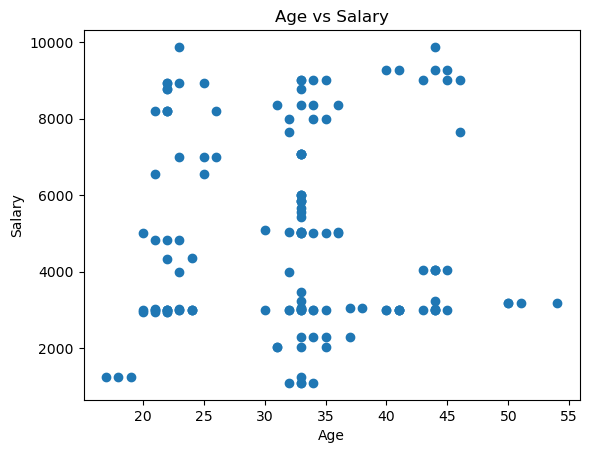

In [59]:
#Plot the chart with age and salary
plt.scatter(df['age'], df['salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

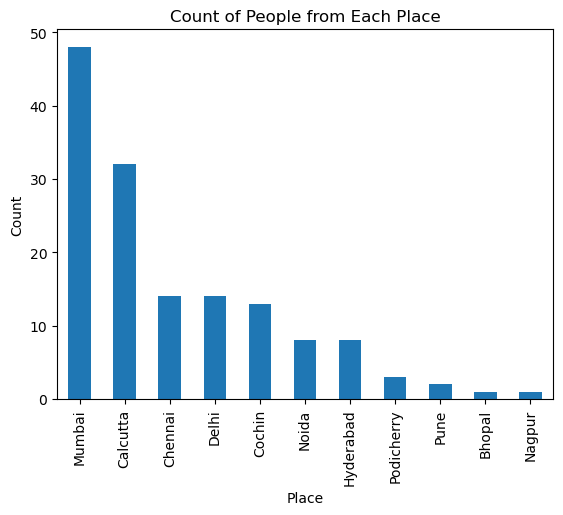

In [61]:
# Count the number of people from each place and represent it visually.
place_counts = df['place'].value_counts()
place_counts.plot(kind='bar', title='Count of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

# Data Encoding

In [68]:
# Label Encoding for 'gender' (binary category)
if 'gender' in df.columns:
    le = LabelEncoder()
    df['gender'] = le.fit_transform(df['gender'])

# One-hot encoding for other categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'gender']  # already label encoded

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print('Encoded DataFrame columns:')
print(df_encoded.columns)

Encoded DataFrame columns:
Index(['age', 'salary', 'gender', 'company_Congnizant', 'company_Infosys',
       'company_Infosys Pvt Lmt', 'company_TCS',
       'company_Tata Consultancy Services', 'place_Calcutta', 'place_Chennai',
       'place_Cochin', 'place_Delhi', 'place_Hyderabad', 'place_Mumbai',
       'place_Nagpur', 'place_Noida', 'place_Podicherry', 'place_Pune'],
      dtype='object')


# Feature Scaling

In [73]:
# Identify numeric columns for scaling
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# StandardScaler
scaler_std = StandardScaler()
df_std_scaled = df_encoded.copy()
df_std_scaled[numeric_cols] = scaler_std.fit_transform(df_encoded[numeric_cols])

In [81]:
#MinMaxScaler
scaler_mm = MinMaxScaler()
df_mm_scaled = df_encoded.copy()
df_mm_scaled[numeric_cols] = scaler_mm.fit_transform(df_encoded[numeric_cols])

In [75]:
# MinMaxScaler
scaler_mm = MinMaxScaler()
df_mm_scaled = df_encoded.copy()
df_mm_scaled[numeric_cols] = scaler_mm.fit_transform(df_encoded[numeric_cols])

print("Sample of Standard Scaled Data:")
print(df_std_scaled.head())

print("\nSample of MinMax Scaled Data:")
print(df_mm_scaled.head())

Sample of Standard Scaled Data:
        age    salary    gender  company_Congnizant  company_Infosys  \
0 -1.484676 -0.766279 -0.534522               False            False   
1 -0.267174 -0.766279 -0.534522               False             True   
2  0.341577 -1.045833 -0.534522               False            False   
3  0.950328 -0.766279 -0.534522               False             True   
4 -1.119426 -0.366915 -0.534522               False            False   

   company_Infosys Pvt Lmt  company_TCS  company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   place_Calcutta  place_Chennai  place_Cochin  place_Delhi  place